In [1]:
import pandas as pd 
import matplotlib.pyplot as plt        
from sklearn.model_selection import train_test_split  
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor  
from sklearn.metrics import r2_score    


In [2]:


# rf_model = RandomForestRegressor(n_estimators=100)
# rf_model.fit(X, y)
# # Predict
# rf_predictions = rf_model.predict(X)
# # Calculate R²
# rf_r2 = r2_score(y, rf_predictions)
# print(f"Random Forest R² value: {rf_r2}")

###############################################

# rf_model = RandomForestRegressor(n_estimators=100)
# gb_model = GradientBoostingRegressor(n_estimators=100)
# # Combine models into a voting regressor
# ensemble_model = VotingRegressor([('rf', rf_model), ('gb', gb_model)])
# # Fit the ensemble model
# ensemble_model.fit(X_train, y_train)
# # Predict
# ensemble_predictions = ensemble_model.predict(X_test)
# # Calculate R²
# ensemble_r2 = r2_score(y_test, ensemble_predictions)
# print(f"Ensemble R² value: {ensemble_r2}")

##################################################
# rf_model = RandomForestRegressor(n_estimators=200)
# gb_model = GradientBoostingRegressor(n_estimators=200)
# xgb_model = XGBRegressor(n_estimators=200)
# # Combine models into a voting regressor
# ensemble_model = VotingRegressor([('rf', rf_model), ('gb', gb_model), ('xgb', xgb_model)])
# # Fit the ensemble model
# ensemble_model.fit(X_train, y_train)
# # Predict
# ensemble_predictions = ensemble_model.predict(X_test)
# # Calculate R²
# ensemble_r2 = r2_score(y_test, ensemble_predictions)
# print(f"Ensemble R² value: {ensemble_r2}")

#Without split

# rf_model = RandomForestRegressor(n_estimators=200)
# gb_model = GradientBoostingRegressor(n_estimators=200)
# xgb_model = XGBRegressor(n_estimators=200)
# # Combine models into a voting regressor
# ensemble_model = VotingRegressor([('rf', rf_model), ('gb', gb_model), ('xgb', xgb_model)])
# # Fit the ensemble model
# ensemble_model.fit(X, y)
# # Predict
# ensemble_predictions = ensemble_model.predict(X)
# # Calculate R²
# ensemble_r2 = r2_score(y, ensemble_predictions)
# print(f"Ensemble R² value: {ensemble_r2}")

/tmp/ipykernel_28720/2131006532.py:13: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/tmp/ipykernel_28720/2131006532.py:13: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/tmp/ipykernel_28720/2131006532.py:13: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/tmp/ipykernel_28720/2131006532.py:13: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/tmp/ipykernel_28720

IPC values have been written to 'ipc_values.csv'.
Ensemble R² value: 0.9270274149559856
Predicted vs Actual values have been written to 'predicted_vs_actual.csv'.


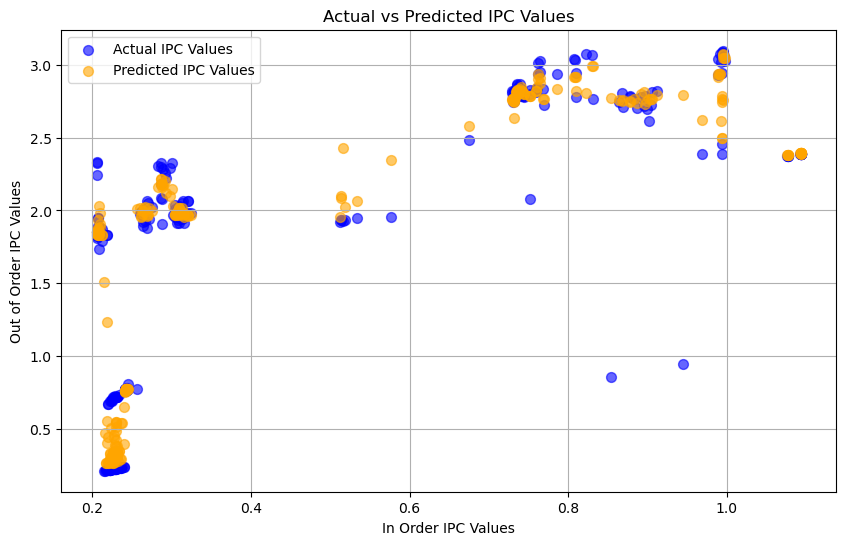

In [3]:
import pandas as pd          
import matplotlib.pyplot as plt        
from sklearn.model_selection import train_test_split  
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor 
from sklearn.metrics import r2_score     

def process_csv(file_paths):
    # Initialize lists to store IPC values from each file
    all_ipc_values = []

    for file_path in file_paths:
        # Load the CSV file
        df = pd.read_csv(file_path)
        
        # Replace all non-numeric values with 0
        df = df.apply(pd.to_numeric, errors='coerce').fillna(0)
        
        # Calculate the number of rows for 0.5%
        total_rows = len(df)
        rows_per_chunk = int(total_rows * 0.005)
        
        # Initialize lists to store the sums for each 0.5% chunk and the IPC values
        instruction_sums = []
        cpu_cycle_sums = []
        ipc_values = []
        
        # Loop through the DataFrame in chunks of 0.5%
        for start_row in range(0, total_rows, rows_per_chunk):
            # Select the current 0.5% chunk of rows
            end_row = min(start_row + rows_per_chunk, total_rows)
            chunk = df.iloc[start_row:end_row]
            
            # Sum the values in the 'instruction' and 'cpu-cycle' columns for the current chunk
            instruction_sum = chunk['instruction'].sum()  # Sum the 'instruction' column
            cpu_cycle_sum = chunk['cpu-cycle'].sum()      # Sum the 'cpu-cycle' column
            
            # Append the sums of the current chunk to the respective lists
            instruction_sums.append(instruction_sum)
            cpu_cycle_sums.append(cpu_cycle_sum)
            
            # Calculate IPC for the current chunk and append it to the IPC list
            if cpu_cycle_sum != 0:
                ipc = instruction_sum / cpu_cycle_sum
            else:
                ipc = 0  
            
            ipc_values.append(ipc)

        all_ipc_values.append(ipc_values)

    # Return IPC values for all files
    return all_ipc_values

# List of CSV files for In Order and Out of Order
in_order_files = ['In Order 500.csv', 'In Order 511.csv','In Order 507.csv','In Order 503.csv','In Order 520.csv','In Order 549.csv','In Order 538.csv']  # Add more In Order CSV file names as needed
out_of_order_files = ['OO 500.csv', 'OO 511.csv','OO 507.csv','OO 503.csv','OO 520.csv','In Order 549.csv','OO 538.csv']          # Add more OO CSV file names as needed

# Process the CSV files
result1 = process_csv(in_order_files)  #In Order CSV files
result2 = process_csv(out_of_order_files)  #Out of Order CSV files

# Flatten the results if multiple files are provided
result1_flat = [item for sublist in result1 for item in sublist]
result2_flat = [item for sublist in result2 for item in sublist]

# Create a new DataFrame to hold the IPC values with appropriate labels
data = {
    'In Order': result1_flat,
    'Out of Order': result2_flat
}

# Create DataFrame
ipc_df = pd.DataFrame(data)

# Save the DataFrame to a new CSV file
ipc_df.to_csv('ipc_values.csv', index=False)

# Print confirmation
print("IPC values have been written to 'ipc_values.csv'.")

# Now we can move on to training the model using the IPC values
# Combine results for model training
X = ipc_df[['In Order']].dropna()  # Using 'In Order' as the feature
y = ipc_df['Out of Order'].dropna()  # Using 'Out of Order' as the target

# Ensure alignment of X and y
X = X.loc[y.index]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
rf_model = RandomForestRegressor(n_estimators=100)
gb_model = GradientBoostingRegressor(n_estimators=100)
# Combine models into a voting regressor
ensemble_model = VotingRegressor([('rf', rf_model), ('gb', gb_model)])
# Fit the ensemble model
ensemble_model.fit(X_train, y_train)
# Predict
ensemble_predictions = ensemble_model.predict(X_test)
# Calculate R²
ensemble_r2 = r2_score(y_test, ensemble_predictions)
print(f"Ensemble R² value: {ensemble_r2}")

# Create a DataFrame for Actual, Predicted values, and X values
results_df = pd.DataFrame({
    'In Order IPC': X_test.values.flatten(),  # In Order IPC as X
    'Out of Order IPC (Actual)': y_test.values,       # Out of Order IPC as actual
    'Out of Order IPC (Predicted)': ensemble_predictions
})

results_df.to_csv('predicted_vs_actual.csv', index=False)
print("Predicted vs Actual values have been written to 'predicted_vs_actual.csv'.")

# Plotting Actual vs Predicted IPC Values
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.6, label='Actual IPC Values', s=50)  # Plot actual values
plt.scatter(X_test, ensemble_predictions, color='orange', alpha=0.6, label='Predicted IPC Values', s=50)  # Plot predicted values
# Set axis labels
plt.xlabel('In Order IPC Values')  
plt.ylabel('Out of Order IPC Values')  
plt.title('Actual vs Predicted IPC Values')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
# Create a DataFrame for Actual, Predicted values, and X values
results_df = pd.DataFrame({
    'In Order IPC (X)': X_test.values.flatten(),  # In Order IPC as X
    'Out of Order IPC (Actual)': y_test.values,       # Out of Order IPC as actual
    'Out of Order IPC (Predicted)': ensemble_predictions
})

# Save the results to a CSV file
results_df.to_csv('predicted_vs_actual.csv', index=False)

# Print confirmation
print("Predicted vs Actual values have been written to 'predicted_vs_actual.csv'.")

Predicted vs Actual values have been written to 'predicted_vs_actual.csv'.
